análise exploratória dos dados (quantas seleções já participaram/ TOP 5 campeões/ Maiores artilheiros/ Media de gols por final)

crescimento do publico

* Qual a média de gols das finais das copas - 
* TOP 5 campeões - CLEITON
* Maiores artilheiros - 
* Quantidade de seleções participantes - 
* Maior e Média de publico das copas - 
* Quantidade de cartões amarelos em finais de copa - 
* Quantidade de cartões vermelhos após o segundo amarelo -  
* Seleção que mais marcou gols em uma final - 
* Relação entre a população do país no ano e o público dos jogos - 

G=Goal, 
OG=Own Goal, 
Y=Yellow Card, 
R=Red Card, 
SY = Red Card by second yellow, 
P=Penalty, 
MP=Missed Penalty, 
I = Substitution In, 
O=Substitute Out


### 1. Público das copas por ano

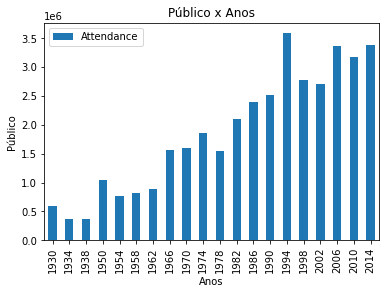

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('WorldCups.csv', sep=',')

df['Attendance'] = df['Attendance'].str.replace('.','', regex=True).astype(int)

df = df[['Year', 'Attendance']]

df.plot(kind='bar', x='Year')

plt.xlabel('Anos')
plt.ylabel('Público')
plt.title('Público x Anos')

plt.show()

### 2. Quantidade de cartões amarelos em finais de copas

In [60]:
df_players = pd.read_csv('WorldCupPlayers.csv')
df_matches = pd.read_csv('WorldCupMatches.csv')

df_players['Yellow Card'] = df_players['Event'].str.contains('Y')

df_players.fillna(False)

df_players = df_players.loc[df_players['Yellow Card'] == True].copy()

df_final_cards = pd.merge(df_players, df_matches, on='MatchID', how='inner')

df_final_cards = df_final_cards.loc[df_final_cards['Stage'] == 'Final']

total_yellow_cards = df_final_cards[['MatchID', 'Yellow Card']].shape[0]

print(f'Em finais de copa do mundo, ao todo já foram aplicados {total_yellow_cards} cartões amarelos.')

Em finais de copa do mundo, ao todo já foram aplicados 70 cartões amarelos.


### 3. Média de gols em finais

In [16]:
import math

df_matches = pd.read_csv('WorldCupMatches.csv')

df_matches = df_matches[(df_matches['Stage'] == 'Final')]

df_matches['Year'] = df_matches['Year'].astype(str).str.replace('.0', '', regex=False)

df_matches['Total Goals'] = df_matches['Home Team Goals'] + df_matches['Away Team Goals']

media_gols_finais = df_matches['Total Goals'].mean()
media_gols_finais_time_casa = df_matches['Home Team Goals'].mean()
media_gols_finais_time_fora = df_matches['Away Team Goals'].mean()

print(f'A média de gols em finais de copa é de: {math.ceil(media_gols_finais)}\nA média de gols em finais de copa dos times da casa é de: {math.ceil(media_gols_finais_time_casa)}\nA média de gols em finais de copa dos times visitantes é de: {math.ceil(media_gols_finais_time_fora)}')

A média de gols em finais de copa é de: 4
A média de gols em finais de copa dos times da casa é de: 3
A média de gols em finais de copa dos times visitantes é de: 2


### 4. Seleção que mais marcou gols em uma final

In [53]:

df_matches = pd.read_csv('WorldCupMatches.csv')

df_matches[['Home Team Initials', 'Away Team Initials']] = df_matches[['Home Team Initials', 'Away Team Initials']].fillna('-')
df_matches['MatchID'] = df_matches['MatchID']
df_matches[['Home Team Goals', 'Away Team Goals']] = df_matches[['Home Team Goals', 'Away Team Goals']].fillna(0).astype(int)

df_matches[['MatchID', 'Stage', 'Home Team Goals', 'Away Team Goals', 'Home Team Initials', 'Away Team Initials']].loc[df_matches['Stage'] == 'Final'].max()

# df_matches.loc[df_matches['Stage'] == 'Final'].max()

MatchID               300186501.0
Stage                       Final
Home Team Goals                 5
Away Team Goals                 3
Home Team Initials            URU
Away Team Initials            TCH
dtype: object

### 5. Maiores artilheiros

In [59]:
df_players = pd.read_csv('WorldCupPlayers.csv')

df_players['Event'] = df_players['Event'].fillna('-')

df_players.loc[df_players['Event'].str.contains('G')]

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
...,...,...,...,...,...,...,...,...,...
37619,255955,300186474,GER,LOEW Joachim (GER),S,18,KROOS,NaN,G24' G26'
37631,255955,300186474,GER,LOEW Joachim (GER),N,9,SCH�RRLE,NaN,I58' G69' G79'
37701,255957,300186502,NED,Louis VAN GAAL (NED),S,5,BLIND,NaN,G17' O70'
37713,255957,300186502,NED,Louis VAN GAAL (NED),S,20,WIJNALDUM,NaN,G90'


In [10]:
df_goals = pd.read_csv('WorldCupMatches.csv')

df_goals[['Home Team Name', 'Away Team Name']] = df_goals[['Home Team Name', 'Away Team Name']].fillna('-')

df_home_goals = df_goals[['Home Team Name', 'Home Team Goals']].copy()

df_home_goals = df_home_goals.rename(columns={'Home Team Name':'Team Name'})

df_home_goals = df_home_goals.groupby('Team Name')

df_home_goals = df_home_goals['Home Team Goals'].sum()

df_home_goals.head(20).sort_values(ascending=False)



Team Name
Brazil            180.0
Argentina         111.0
Austria            31.0
Czechoslovakia     27.0
Belgium            27.0
Chile              25.0
Colombia           11.0
Bulgaria           11.0
Cameroon           11.0
Australia           7.0
Costa Rica          7.0
Algeria             5.0
Cuba                5.0
Croatia             3.0
Bolivia             1.0
Canada              0.0
China PR            0.0
Angola              0.0
Czech Republic      0.0
-                   0.0
Name: Home Team Goals, dtype: float64

In [11]:
df_away_goals = df_goals[['Away Team Name','Away Team Goals']].copy()

df_away_goals = df_away_goals.rename(columns={'Away Team Name':'Team Name'})

df_away_goals = df_away_goals.groupby('Team Name')

df_away_goals = df_away_goals['Away Team Goals'].sum()

df_away_goals.head(20).sort_values(ascending=False)

Team Name
Brazil            45.0
Belgium           27.0
Argentina         22.0
Croatia           18.0
Colombia          18.0
Czechoslovakia    17.0
Chile             16.0
Austria           12.0
Costa Rica        11.0
Bulgaria          11.0
Algeria            9.0
Cameroon           7.0
Australia          4.0
Czech Republic     3.0
Angola             1.0
Canada             0.0
China PR           0.0
Bolivia            0.0
Cuba               0.0
-                  0.0
Name: Away Team Goals, dtype: float64

In [21]:
df_total_goals = pd.merge(df_home_goals, df_away_goals, on='Team Name', how='inner')


df_total_goals['Total Goals'] = df_total_goals.apply(lambda x: x['Home Team Goals'] + x['Away Team Goals'], axis=1)

df_total_goals = df_total_goals.drop(['Home Team Goals', 'Away Team Goals'], axis=1)


df_total_goals.sort_values(by='Total Goals', ascending=False).head(5)

,Total Goals
Team Name,
Brazil,225.0
Argentina,133.0
Germany FR,131.0
Italy,128.0
France,108.0


In [7]:
df_goals = pd.read_csv('WorldCupMatches.csv')
df_goals = df_goals[['Home Team Name', 'Away Team Name']].replace('rn">', '', regex=True)

df_goals.to_excel('teste.xlsx')